## Analyse exploratoire

In [1]:
import pandas as pd
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

/Users/ismaelzerrouk/Documents/Projets_Data_2025/Projet-anti-churn/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Path to dataset files: /Users/ismaelzerrouk/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [3]:
path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")   # Path to the CSV file


In [4]:
df = pd.read_csv(path)

# Exploration des données

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.Churn.value_counts(
)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Unbalanced dataset how to fix that ?

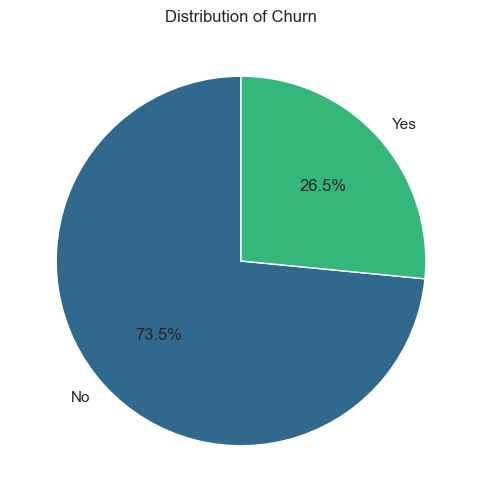

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a pie chart for the 'Churn' column
plt.figure(figsize=(10, 6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 2))
plt.title('Distribution of Churn')
plt.ylabel('')  # Remove the y-label
plt.show()


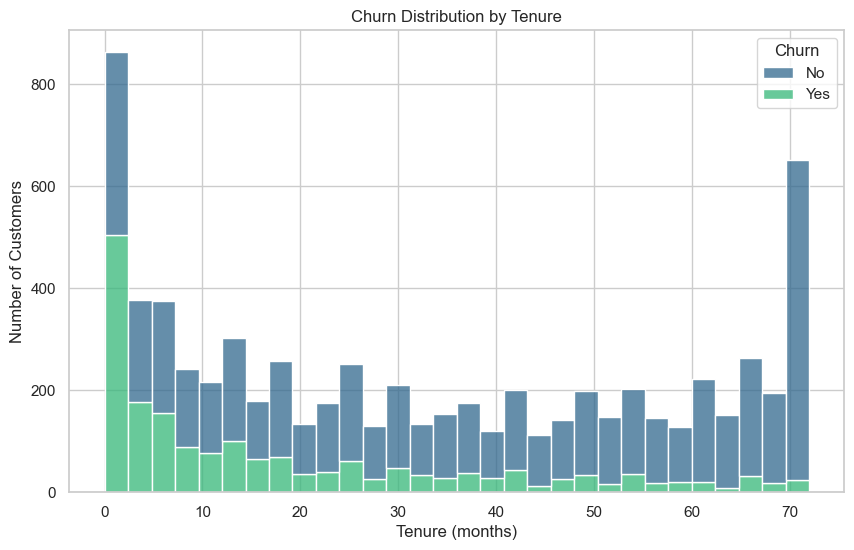

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='viridis', bins=30)
plt.title('Churn Distribution by Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()

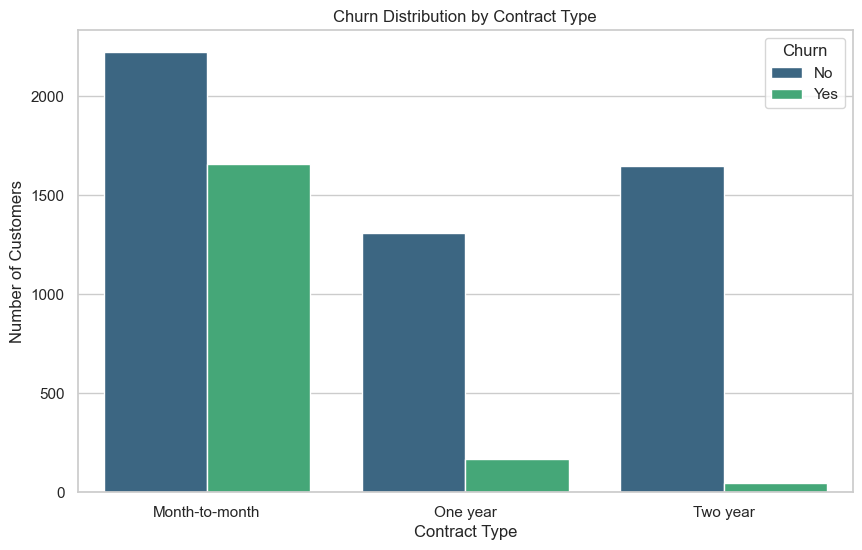

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

# Data encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables to boolean
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [15]:
from imblearn.over_sampling import SMOTE

# Separate the features and the target variable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target variable into a new DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Churn'] = y_resampled

# Display the new class distribution
print(df_resampled['Churn'].value_counts())

Churn
0    5174
1    5174
Name: count, dtype: int64


/Users/ismaelzerrouk/Documents/Projets_Data_2025/Projet-anti-churn/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


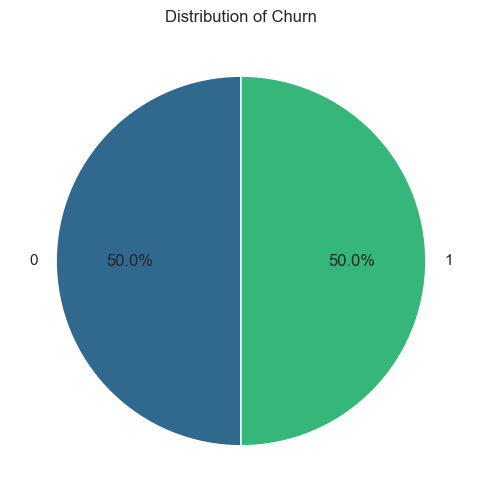

In [16]:
plt.figure(figsize=(10, 6))
df_resampled['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', 2))
plt.title('Distribution of Churn')
plt.ylabel('')  # Remove the y-label
plt.show()

In [17]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        10348 non-null  int64  
 1   gender            10348 non-null  int64  
 2   SeniorCitizen     10348 non-null  int64  
 3   Partner           10348 non-null  int64  
 4   Dependents        10348 non-null  int64  
 5   tenure            10348 non-null  int64  
 6   PhoneService      10348 non-null  int64  
 7   MultipleLines     10348 non-null  int64  
 8   InternetService   10348 non-null  int64  
 9   OnlineSecurity    10348 non-null  int64  
 10  OnlineBackup      10348 non-null  int64  
 11  DeviceProtection  10348 non-null  int64  
 12  TechSupport       10348 non-null  int64  
 13  StreamingTV       10348 non-null  int64  
 14  StreamingMovies   10348 non-null  int64  
 15  Contract          10348 non-null  int64  
 16  PaperlessBilling  10348 non-null  int64 

In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the resampled dataset
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Convert the scaled data back to a DataFrame
df_resampled_scaled = pd.DataFrame(X_resampled_scaled, columns=X_resampled.columns)

# Add the target variable back to the scaled DataFrame
df_resampled_scaled['Churn'] = y_resampled.values

# Display the first few rows of the scaled DataFrame
df_resampled_scaled.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.927620,-0.857027,-0.391291,1.306707,-0.51992,-1.139561,-2.749389,0.146030,-1.153132,-0.747942,...,-0.881677,-0.756737,-1.020999,-1.023018,-0.634730,0.848744,0.469119,-1.375356,-0.405240,0
1,0.230720,1.166824,-0.391291,-0.765283,-0.51992,0.275228,0.363717,-0.954565,-1.153132,1.740708,...,1.482254,-0.756737,-1.020999,-1.023018,0.680749,-1.178212,1.480040,-0.396847,-0.950929,0
2,-0.458783,1.166824,-0.391291,-0.765283,-0.51992,-1.096689,0.363717,-0.954565,-1.153132,1.740708,...,-0.881677,-0.756737,-1.020999,-1.023018,-0.634730,0.848744,1.480040,-0.508780,-1.638424,1
3,1.006533,1.166824,-0.391291,-0.765283,-0.51992,0.746824,-2.749389,0.146030,-1.153132,1.740708,...,1.482254,1.721729,-1.020999,-1.023018,0.680749,-1.178212,-1.552723,-0.925820,-0.985593,0
4,1.487903,-0.857027,-0.391291,-0.765283,-0.51992,-1.096689,0.363717,-0.954565,0.306336,-0.747942,...,-0.881677,-0.756737,-1.020999,-1.023018,-0.634730,0.848744,0.469119,0.099629,-1.235065,1


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Split the resampled and scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.8289855072463768
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1021
           1       0.81      0.87      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070

------------------------------------------------------------
Model: Decision Tree
Accuracy: 0.808695652173913
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1021
           1       0.81      0.81      0.81      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070

------------------------------------------------------------
Model: Random Forest
Accuracy: 0.8541062801932368
              precision    recall  f1-score   support

           0  

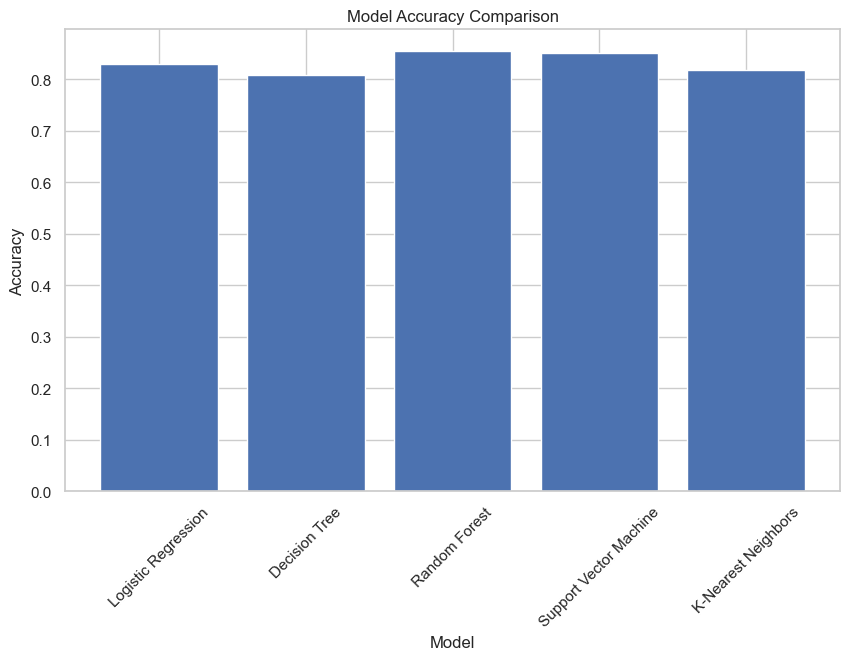

The best model is: Random Forest with an accuracy of 0.85


In [20]:
import matplotlib.pyplot as plt

# Store the accuracy of each model
model_accuracies = {model_name: accuracy_score(y_test, model.predict(X_test)) for model_name, model in models.items()}

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"The best model is: {best_model_name} with an accuracy of {model_accuracies[best_model_name]:.2f}")

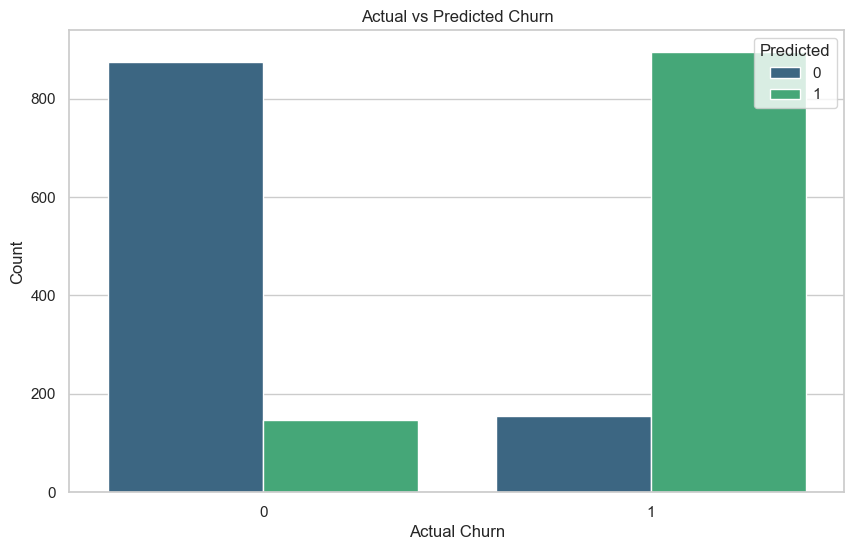

In [21]:
import seaborn as sns

import matplotlib.pyplot as plt

# Predict the test set results
y_pred = models[best_model_name].predict(X_test)

# Create a DataFrame with the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the results
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual', hue='Predicted', data=results, palette='viridis')
plt.title('Actual vs Predicted Churn')
plt.xlabel('Actual Churn')
plt.ylabel('Count')
plt.legend(title='Predicted', loc='upper right')
plt.show()

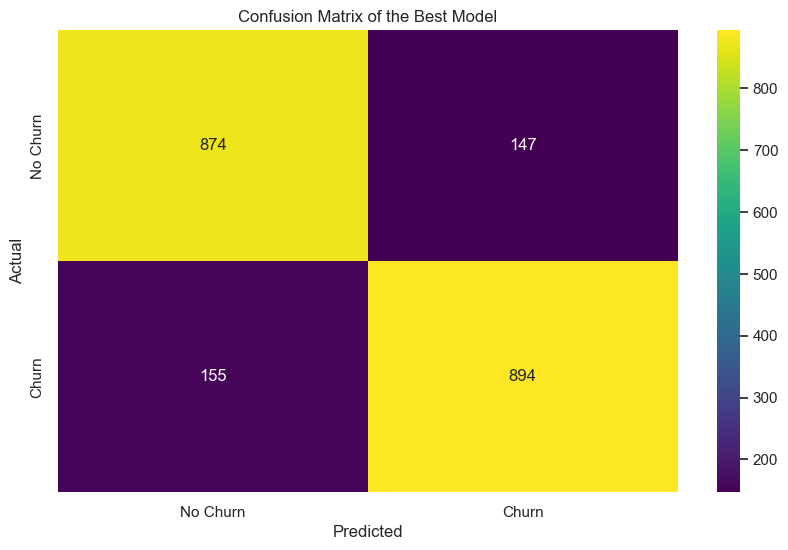

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Predict the test set results using the best model
y_pred = models[best_model_name].predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Best Model')
plt.show()

The most important feature is: Feature       Contract
Importance    0.133869
Name: 15, dtype: object


/var/folders/m9/drzgqc3j6xx56ksyvgztdr3r0000gn/T/ipykernel_45181/3795090309.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')


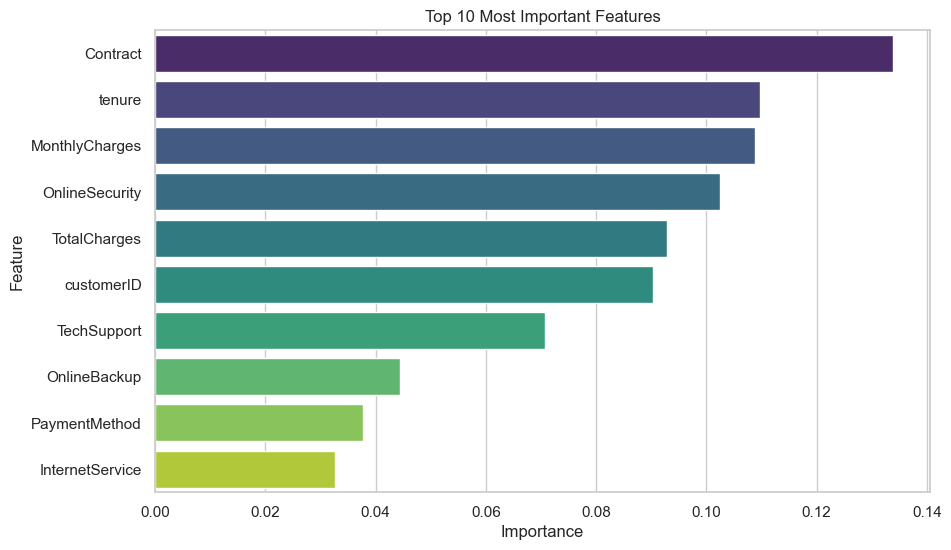

In [23]:
# Get the feature importances from the best model (Random Forest)
importances = models[best_model_name].feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the most important feature
print("The most important feature is:", feature_importances.iloc[0])

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='viridis')
plt.title('Top 10 Most Important Features')
plt.show()

In [ ]:
import joblib
import os

# Define the path to save the model in iCloud
icloud_path = os.path.expanduser("~/Library/Mobile Documents/com~apple~CloudDocs")
model_filename = os.path.join(icloud_path, "best_model.pkl")

# Save the best model
joblib.dump(models[best_model_name], model_filename)

print(f"Model saved to {model_filename}")